In [103]:
!ls ../experiments/baseline_wavlmbase/results/dev.csv

../experiments/baseline_wavlmbase/results/dev.csv


In [58]:
import pandas as pd
import numpy as np

In [104]:
preds = pd.read_csv('../experiments/baseline_wavlmbase/results/dev.csv')
preds.head()

,Filename,Prediction
0,MSP-PODCAST_0002_0033.wav,S
1,MSP-PODCAST_0002_0039.wav,N
2,MSP-PODCAST_0002_0051.wav,C
3,MSP-PODCAST_0002_0061.wav,C
4,MSP-PODCAST_0006_0017.wav,N


In [105]:
df = pd.read_csv('/workspace/lucas.ueda/interspeech_ser/data/Labels/labels_consensus.csv')
df.head()

,FileName,EmoClass,EmoAct,EmoVal,EmoDom,SpkrID,Gender,Split_Set
0,MSP-PODCAST_0002_0033.wav,N,4.8,4.2,5.4,127,Female,Development
1,MSP-PODCAST_0002_0039.wav,N,4.0,4.2,4.2,127,Female,Development
2,MSP-PODCAST_0002_0051.wav,N,4.0,4.2,4.2,127,Female,Development
3,MSP-PODCAST_0002_0059.wav,X,4.0,3.8,4.0,128,Female,Development
4,MSP-PODCAST_0002_0061.wav,F,3.4,2.8,4.2,128,Female,Development


In [130]:
classes = ['Angry', 'Sad', 'Happy', 'Surprise', 'Fear', 'Disgust', 'Contempt', 'Neutral']

train_df = pd.read_csv("../benchmark/processed_labels.csv")
class_frequencies = train_df[classes].sum().to_dict()
# Total number of samples
total_samples = len(train_df)
# Calculate class weights
class_weights = {cls: 1/np.sqrt(freq) if freq != 0 else 0 for cls, freq in class_frequencies.items()}


In [131]:
class_frequencies

{'Angry': 12567.0,
 'Sad': 8647.0,
 'Happy': 23061.0,
 'Surprise': 3935.0,
 'Fear': 1446.0,
 'Disgust': 1974.0,
 'Contempt': 3954.0,
 'Neutral': 36666.0}

In [132]:
class_weights

{'Angry': 0.008920397194880208,
 'Sad': 0.010753931616762061,
 'Happy': 0.006585078130028416,
 'Surprise': 0.015941443036912015,
 'Fear': 0.02629758415191085,
 'Disgust': 0.022507456830317185,
 'Contempt': 0.015903095520751125,
 'Neutral': 0.0052223771550426925}

In [129]:
1/12567

7.957348611442667e-05

In [106]:
preds['FileName'] = preds['Filename']
preds = preds.merge(df[['FileName','EmoClass','Gender','SpkrID']], how='left', on = 'FileName')

In [107]:
preds['EmoClass'].isnull().sum()

0

In [108]:
preds.head()

,Filename,Prediction,FileName,EmoClass,Gender,SpkrID
0,MSP-PODCAST_0002_0033.wav,S,MSP-PODCAST_0002_0033.wav,N,Female,127
1,MSP-PODCAST_0002_0039.wav,N,MSP-PODCAST_0002_0039.wav,N,Female,127
2,MSP-PODCAST_0002_0051.wav,C,MSP-PODCAST_0002_0051.wav,N,Female,127
3,MSP-PODCAST_0002_0061.wav,C,MSP-PODCAST_0002_0061.wav,F,Female,128
4,MSP-PODCAST_0006_0017.wav,N,MSP-PODCAST_0006_0017.wav,N,Female,127


In [110]:
# !pip install matplotlib

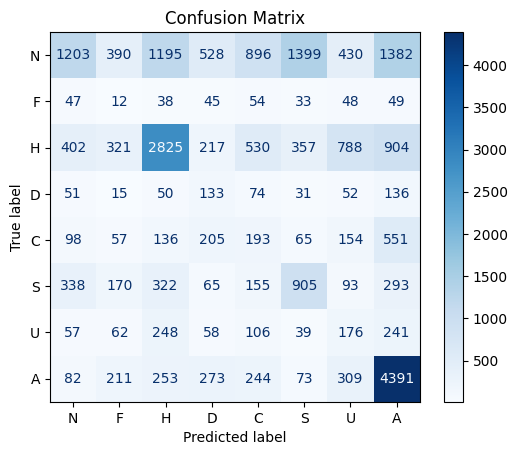

In [111]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(preds['EmoClass'], preds['Prediction'], labels=preds['EmoClass'].unique())

# Display labels
labels = preds['EmoClass'].unique()

# Visualize confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cmd.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [112]:
f1_score(preds['EmoClass'], preds['Prediction'], average='macro')

0.2611939104830867

In [113]:
f1_score(preds['EmoClass'], preds['Prediction'], average='micro')

0.3895003563227492

In [114]:
accuracy_score(preds['EmoClass'], preds['Prediction'])

0.3895003563227492

In [115]:
preds['PRED_dumb'] = 'N'
f1_score(preds['EmoClass'], preds['PRED_dumb'], average='macro'), accuracy_score(preds['EmoClass'], preds['PRED_dumb'])

(0.05678375814693552, 0.2938870852799113)

In [116]:
preds['EmoClass'].value_counts()

EmoClass
N    7423
H    6344
A    5836
S    2341
C    1459
U     987
D     542
F     326
Name: count, dtype: int64

In [117]:
preds.head(2)

,Filename,Prediction,FileName,EmoClass,Gender,SpkrID,PRED_dumb
0,MSP-PODCAST_0002_0033.wav,S,MSP-PODCAST_0002_0033.wav,N,Female,127,N
1,MSP-PODCAST_0002_0039.wav,N,MSP-PODCAST_0002_0039.wav,N,Female,127,N


In [118]:
f1_score(preds[preds['Gender']=='Female']['EmoClass'], preds[preds['Gender']=='Female']['Prediction'], average='macro')

0.24752268899820415

In [119]:
f1_score(preds[preds['Gender']=='Male']['EmoClass'], preds[preds['Gender']=='Male']['Prediction'], average='macro')

0.2701747340600592

In [120]:
accuracy_score(preds[preds['Gender']=='Female']['EmoClass'], preds[preds['Gender']=='Female']['Prediction'])

0.35454385656530146

In [121]:
accuracy_score(preds[preds['Gender']=='Male']['EmoClass'], preds[preds['Gender']=='Male']['Prediction'])

0.4181556195965418

In [122]:
for e in preds['EmoClass'].unique():
    acc = accuracy_score(preds[preds['EmoClass']==e]['EmoClass'], preds[preds['EmoClass']==e]['Prediction'])
    print(f'Emotion {e} acc = {acc}')

Emotion N acc = 0.1620638555839957
Emotion F acc = 0.03680981595092025
Emotion H acc = 0.4453026481715006
Emotion D acc = 0.24538745387453875
Emotion C acc = 0.13228238519533927
Emotion S acc = 0.38658692866296457
Emotion U acc = 0.17831813576494426
Emotion A acc = 0.7523989033584647


# Dimensional

In [42]:
!ls ../benchmark/model/dim_ser/7/results

dev.csv  test3.csv


In [43]:
preds = pd.read_csv('../benchmark/model/dim_ser/7/results/dev.csv')
preds.head()

,FileName,EmoAct,EmoVal,EmoDom
0,MSP-PODCAST_0002_0033.wav,4.110488,3.377474,4.107728
1,MSP-PODCAST_0002_0039.wav,4.309968,3.705411,4.469491
2,MSP-PODCAST_0002_0051.wav,3.757301,4.351225,4.176206
3,MSP-PODCAST_0002_0059.wav,4.127300,3.831695,4.195695
4,MSP-PODCAST_0002_0061.wav,4.053204,3.987261,4.183712


In [46]:
df = pd.read_csv('/workspace/lucas.ueda/interspeech_ser/data/Labels/labels_consensus.csv')
df.head(2)

,FileName,EmoClass,EmoAct,EmoVal,EmoDom,SpkrID,Gender,Split_Set
0,MSP-PODCAST_0002_0033.wav,N,4.8,4.2,5.4,127,Female,Development
1,MSP-PODCAST_0002_0039.wav,N,4.0,4.2,4.2,127,Female,Development


In [47]:
preds = preds.merge(df[['FileName','EmoAct','EmoVal','EmoDom']], how='left', on = 'FileName')

In [49]:
preds.head(2)

,FileName,EmoAct_x,EmoVal_x,EmoDom_x,EmoAct_y,EmoVal_y,EmoDom_y
0,MSP-PODCAST_0002_0033.wav,4.110488,3.377474,4.107728,4.8,4.2,5.4
1,MSP-PODCAST_0002_0039.wav,4.309968,3.705411,4.469491,4.0,4.2,4.2


In [48]:
import torch
def CCC_loss(pred, lab, m_lab=None, v_lab=None, is_numpy=True):
    """
    pred: (N, 3)
    lab: (N, 3)
    """
    if is_numpy:
        pred = torch.Tensor(pred).float()
        lab = torch.Tensor(lab).float()
    
    m_pred = torch.mean(pred, 0, keepdim=True)
    m_lab = torch.mean(lab, 0, keepdim=True)

    d_pred = pred - m_pred
    d_lab = lab - m_lab

    v_pred = torch.var(pred, 0, unbiased=False)
    v_lab = torch.var(lab, 0, unbiased=False)

    corr = torch.sum(d_pred * d_lab, 0) / (torch.sqrt(torch.sum(d_pred ** 2, 0)) * torch.sqrt(torch.sum(d_lab ** 2, 0)))

    s_pred = torch.std(pred, 0, unbiased=False)
    s_lab = torch.std(lab, 0, unbiased=False)

    ccc = (2*corr*s_pred*s_lab) / (v_pred + v_lab + (m_pred[0]-m_lab[0])**2)    
    return ccc

In [54]:
CCC_loss(preds[['EmoAct_x','EmoVal_x','EmoDom_x']].values,preds[['EmoAct_y','EmoVal_y','EmoDom_y']].values)

tensor([0.6949, 0.7050, 0.6312])

In [55]:
preds['EmoAct_d'] = preds['EmoAct_y'].mean() 
preds['EmoVal_d'] = preds['EmoVal_y'].mean() 
preds['EmoDom_d'] = preds['EmoDom_y'].mean() 

In [56]:
CCC_loss(preds[['EmoAct_d','EmoVal_d','EmoDom_d']].values,preds[['EmoAct_y','EmoVal_y','EmoDom_y']].values)

tensor([-0., -0., -0.])